## Data Analysis of real world data

## first we import our needed libraries

In [1]:
import pandas as pd         # our main library for data manipulation
pd.options.mode.chained_assignment = None  # default='warn'
import os                   # operating system library for dealing with files and importing them

In [2]:
my_path = "./files"
files = [file for file in os.listdir(my_path)]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(r"C:\Users\Amr osama abdellatif\Desktop\mixed\pandas project\files\\"+file)
    all_months_data = pd.concat([all_months_data,df])
    
all_months_data.to_csv("all_data.csv",index = False)    
all_months_data.head()    

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
dc = pd.read_csv('all_data.csv')
df = all_months_data

## clean the data

In [4]:
df.drop([1] , axis=0 , inplace = True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [5]:
df1 = df[df.isna().any(axis=1)]
df1.head(1000)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
1571,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.dropna()
df.describe

<bound method NDFrame.describe of       Order ID                     Product Quantity Ordered Price Each  \
0       176558        USB-C Charging Cable                2      11.95   
2       176559  Bose SoundSport Headphones                1      99.99   
3       176560                Google Phone                1        600   
4       176560            Wired Headphones                1      11.99   
5       176561            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
11681   259353      AAA Batteries (4-pack)                3       2.99   
11682   259354                      iPhone                1        700   
11683   259355                      iPhone                1        700   
11684   259356      34in Ultrawide Monitor                1     379.99   
11685   259357        USB-C Charging Cable                1      11.95   

           Order Date                         Purchase Address  
0      04/19

In [8]:
df1 = df[df.isna().any(axis=1)]
df1.head()                           ## now i know ther is no more null values

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [9]:
## split the order data into sseperate columns
df['months'] = df['Order Date'].str[0:2]
df['day'] = df['Order Date'].str[3:5]
df['year'] = df['Order Date'].str[6:8]

In [10]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,day,year
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,19,19
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,07,19
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,12,19
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,12,19
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,30,19


In [11]:
## when i tried to convert months column into type(int) in returned 
## an error in which it said there are a few cells in which it displayed 'or' 
## so i viewed them and deleted them 
df = df[df['Order Date'].str[0:2] !='Or']
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,day,year
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,19,19
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,07,19
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,12,19
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,12,19
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,30,19
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",04,29,19
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",04,02,19
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",04,12,19
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",04,24,19
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",04,08,19


In [12]:
df['months'] = df['months'].astype('int32')
df['day'] = df['day'].astype('int32')
df['year'] = df['year'].astype('int32')

In [13]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

## manipulate and augment 

In [14]:
df['sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,day,year,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,19,19,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,7,19,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,19,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,19,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,30,19,11.99


# lets start the business questions

## which month resulted in the most sales ?

In [15]:
results = df.groupby('months').sum()
print(results)

        Quantity Ordered  Price Each     day    year       sales
months                                                          
1                  10902  1811753.43  155786  184486  1822241.78
2                  13448  2188880.88  174395  227506  2202018.58
3                  17004  2791192.88  241746  287888  2807085.43
4                  20558  3367671.02  282960  347301  3390670.24
5                  18666  3135121.29  264856  314735  3152602.91
6                  15252  2560325.61  209850  257507  2576102.26
7                  16071  2632239.56  227905  271548  2647475.76
8                  13447  2230245.43  192300  227240  2244367.89
9                  13107  2084980.14  180072  220780  2097536.23
10                 22702  3715164.84  326113  385339  3736336.89
11                 19796  3180588.73  272837  333868  3199579.30
12                 28113  4587815.41  401424  474677  4612843.34


##### so the best month is december with a total of  $4612843.34 

### let's plot

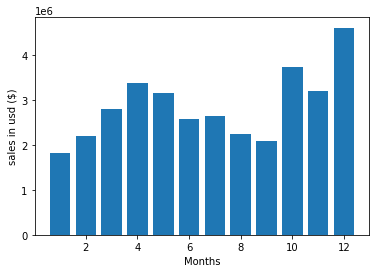

In [16]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months,results['sales'])
plt.xlabel('Months')
plt.ylabel('sales in usd ($)')
plt.show()


In [17]:
df['city'] = df['Purchase Address'].apply(lambda x : x.split(',')[1] + ' ' + '(' + x.split(',')[2].split(' ')[1]) + ')'

In [18]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,day,year,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,19,19,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,7,19,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,19,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,19,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,30,19,11.99,Los Angeles (CA)


In [19]:
city_res = df.groupby('city').sum()

city_res

,Quantity Ordered,Price Each,months,day,year,sales
city,,,,,,
Atlanta (GA),16602,2779908.20,104794,234837,282739,2795498.58
Austin (TX),11148,1809834.76,69806,156708,188140,1819519.00
Boston (MA),22528,3637409.77,141112,312376,378750,3661642.01
Dallas (TX),16728,2752523.99,104607,234401,281544,2767871.57
Los Angeles (CA),33288,5421045.24,208315,469579,562477,5452180.81
New York City (NY),27931,4634770.83,175729,392677,472635,4663717.43
Portland (ME),2750,447189.25,17144,38288,46645,449758.27
Portland (OR),11302,1860543.27,70620,159205,190173,1870717.39
San Francisco (CA),50237,8209757.90,315512,702626,849882,8260500.07


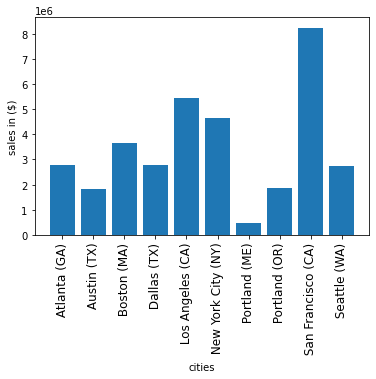

In [20]:
city_unique = [city for city , df in df.groupby('city')]


plt.bar(city_unique,city_res['sales'])
plt.xticks(city_unique,rotation='vertical',size=12)
plt.xlabel('cities')
plt.ylabel('sales in ($)')
plt.show()

### what time should we advertise to maxmize likelihood of a customer buying a product ?

In [21]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [22]:
df['hour'] = df['Order Date'].dt.hour
df['minutes'] = df['Order Date'].dt.minute
df['count'] = 1
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,day,year,sales,city,hour,minutes,count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19,19,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,7,19,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,19,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,19,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,30,19,11.99,Los Angeles (CA),9,27,1


In [23]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,day,year,sales,city,hour,minutes,count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19,19,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,7,19,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,19,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,19,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,30,19,11.99,Los Angeles (CA),9,27,1


In [24]:
hour_unique = [hour for hour , df in df.groupby('hour')]

In [25]:
ss = df.groupby(['hour']).count()

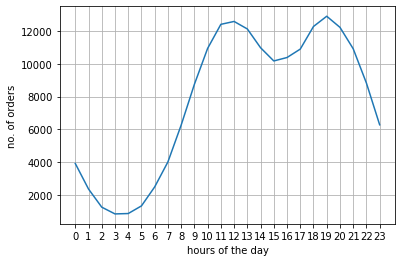

In [26]:
plt.plot(hour_unique,df.groupby((df['hour'])).count()['count'])
plt.xticks(hour_unique)
plt.grid()
plt.xlabel('hours of the day')
plt.ylabel('no. of orders')
plt.show()

###### my recommendations are hours around 11 am and 7 pm

### next question : what are products most often sold together ?

In [27]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,day,year,sales,city,hour,minutes,count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19,19,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,7,19,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,19,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,19,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,30,19,11.99,Los Angeles (CA),9,27,1


In [28]:
df1 = df[df['Order ID'].duplicated(keep=False)]
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,day,year,sales,city,hour,minutes,count
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,19,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,19,11.99,Los Angeles (CA),14,38,1
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,3,19,600.00,Los Angeles (CA),19,42,1
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,3,19,11.95,Los Angeles (CA),19,42,1
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,7,19,99.99,Boston (MA),11,31,1


In [29]:
df1['grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df1 = df1[['Order ID','grouped']].drop_duplicates()


In [31]:
df1.head()

,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [39]:
from itertools import combinations
from collections import Counter

In [50]:
count = Counter()

for row in df1['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key, value in count.most_common(10):
    print (key,value)

('iPhone', 'Lightning Charging Cable') 1004
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 91


### last question : what product sold the most ? why do you think it sold the most ?

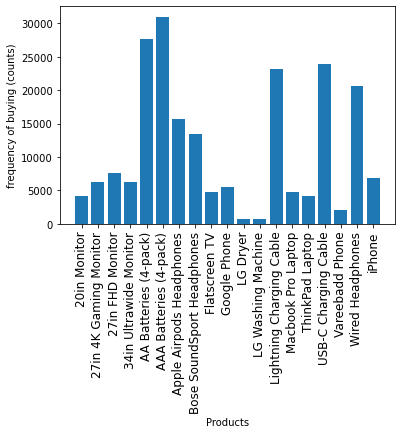

In [89]:
#df.head()
product_group = df.groupby(df['Product'])
quantity_ordered = product_group.sum()['Quantity Ordered']
quantity_ordered

products = [product for product , df in product_group]
plt.bar(products,quantity_ordered)
plt.xticks(products,rotation='vertical',size=12)
plt.xlabel('Products')
plt.ylabel('frequency of buying (counts)')
plt.show()



#### so the product that sold most is the AAA batteries 

In [117]:
avg_prices = df.groupby(df['Product']).mean()['Price Each']

C:\Users\AMROSA~1\AppData\Local\Temp/ipykernel_16688/3970741308.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(products,avg_prices,'b-',color = 'r')
C:\Users\AMROSA~1\AppData\Local\Temp/ipykernel_16688/3970741308.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=12)


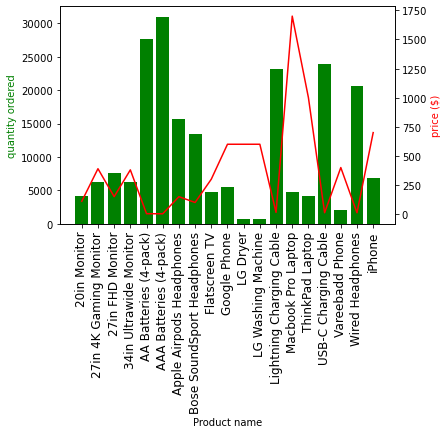

In [118]:
fig,ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered,color = "g")
ax2.plot(products,avg_prices,'b-',color = 'r')

ax1.set_xlabel('Product name')
ax1.set_ylabel('quantity ordered',color = 'g')
ax2.set_ylabel('price ($)',color = 'r')
ax1.set_xticklabels(products,rotation='vertical',size=12)
plt.show()

#### the reason for the AAA batteries to sell the most seems like for it's cheap cost

# that's about it , Thanks